## Dataset gathering:

The dataset is collected from Kaggle https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia which has in total 5863 chest X-Ray images. It’s organized into 3 folders (train, test, val) folders and each folder contains 2 sub-folders (NORMAL, PNEUMONIA).


Since the val folder contains only 16 images, I have decided to move the images and their corresponding label to the train folder. So, we have now two folders (train, test)

## Importing the libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [15]:
# Sitting the path to read the images
my_data_dir = 'C:\\Users\\agssh\\Desktop\\TensorFlow\\CW\\chest_xray'

In [16]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir)

['test', 'train']

__Now we will set train and test folders path__

In [17]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [18]:
# CONFIRM THAT THIS REPORTS BACK 'NORMAL', 'PNEUMONIA'
os.listdir(test_path)

['NORMAL', 'PNEUMONIA']

In [19]:
os.listdir(train_path)

['NORMAL', 'PNEUMONIA']

__In this Notebook, we will build Convolutional Neural Network CNN model to detect the PNEUMONIA cases from X-Ray images.__


### 1- Train images

In [20]:
# creating list of dictionaries that contain all the images in train normal folder and assining 0 as label
files = []
for fn in Path(train_path+'\\NORMAL\\').glob("*.jpeg"):
    files.append({"filename": fn.name, "class": 0})

In [21]:
# creating dataframe from the list of dictionaries
train_normal=pd.DataFrame.from_dict(files)

In [22]:
# creating list of dictionaries that contain all the images in train PNEUMONIA folder and assining 1 as label
files = []
for fn in Path(train_path+'\\PNEUMONIA\\').glob("*.jpeg"):
    files.append({"filename": fn.name, "class": 1})

In [23]:
# creating dataframe from the list of dictionaries
train_pneumonia=pd.DataFrame.from_dict(files)

__Now we will concatenate the train dataframes together__

In [24]:
train=[train_normal,train_pneumonia]

In [25]:
train_df=pd.concat(train)

In [26]:
train_df.head()

,filename,class
0,IM-0115-0001.jpeg,0
1,IM-0117-0001.jpeg,0
2,IM-0119-0001.jpeg,0
3,IM-0122-0001.jpeg,0
4,IM-0125-0001.jpeg,0


__Now lets count how many images we have per class in the train dataframe__

In [27]:
train_normal_count=train_df[train_df['class']==0]["filename"].count()

In [28]:
train_pneumonia_count=train_df[train_df['class']==1]["filename"].count()

Total number of train normal images: 1349
Total number of train pneumonia images: 3883


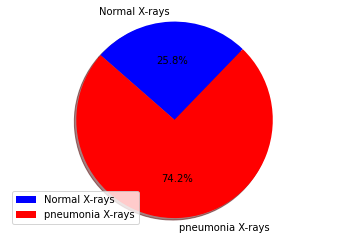

In [29]:
print("Total number of train normal images:", train_normal_count)
print("Total number of train pneumonia images:", train_pneumonia_count)


fig1,ax1= plt.subplots()
sizes=[train_normal_count, train_pneumonia_count]
ax1.pie(sizes, startangle=46 ,labels=["Normal X-rays","pneumonia X-rays"], autopct="%1.1f%%", shadow=True, colors=["b","r"])
ax1.axis("equal")
plt.legend()
plt.show()

### 2- Test images

In [30]:
# creating list of dictionaries that contain all the images in test normal folder and assining 0 as label
files = []
for fn in Path(test_path+'\\NORMAL\\').glob("*.jpeg"):
    files.append({"filename": fn.name, "class": 0})

In [31]:
# creating dataframe from the list of dictionaries
test_normal=pd.DataFrame.from_dict(files)

In [32]:
# creating list of dictionaries that contain all the images in test PNEUMONIA folder and assining 1 as label
files = []
for fn in Path(test_path+'\\PNEUMONIA\\').glob("*.jpeg"):
    files.append({"filename": fn.name, "class": 1})

In [33]:
# creating dataframe from the list of dictionaries
test_pneumonia=pd.DataFrame.from_dict(files)

__Now we will concatenate the test dataframes together__

In [34]:
test=[test_normal,test_pneumonia]

In [35]:
test_df=pd.concat(test)

In [36]:
test_df.head()

,filename,class
0,IM-0001-0001.jpeg,0
1,IM-0003-0001.jpeg,0
2,IM-0005-0001.jpeg,0
3,IM-0006-0001.jpeg,0
4,IM-0007-0001.jpeg,0


__Now lets count how many images we have per class in the test dataframe__

In [37]:
test_normal_count=test_df[test_df['class']==0]["filename"].count()

In [38]:
test_pneumonia_count=test_df[test_df['class']==1]["filename"].count()

Total number of test normal images: 234
Total number of test pneumonia images: 390


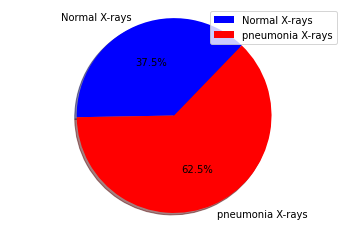

In [39]:
print("Total number of test normal images:", test_normal_count)
print("Total number of test pneumonia images:", test_pneumonia_count)


fig1,ax1= plt.subplots()
sizes=[test_normal_count, test_pneumonia_count]
ax1.pie(sizes, startangle=46 ,labels=["Normal X-rays","pneumonia X-rays"], autopct="%1.1f%%", shadow=True, colors=["b","r"])
ax1.axis("equal")
plt.legend()
plt.show()

__Now we will concatenate the test and train dataframes together to visulize the whole data label distribution__

In [40]:
total=[train_df,test_df]

In [41]:
final_df=pd.concat(total)

In [42]:
df_normal_count=final_df[final_df['class']==0]["filename"].count()
df_pneumonia_count=final_df[final_df['class']==1]["filename"].count()

Total number of normal images: 1583
Total number of pneumonia images: 4273


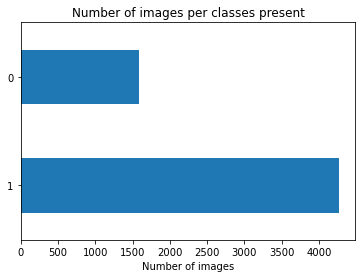

In [43]:
print("Total number of normal images:", df_normal_count)
print("Total number of pneumonia images:", df_pneumonia_count)

final_df['class'].value_counts().plot.barh()
plt.xlabel("Number of images")
_ = plt.title("Number of images per classes present")

### Visulizing the images in the train and test folders

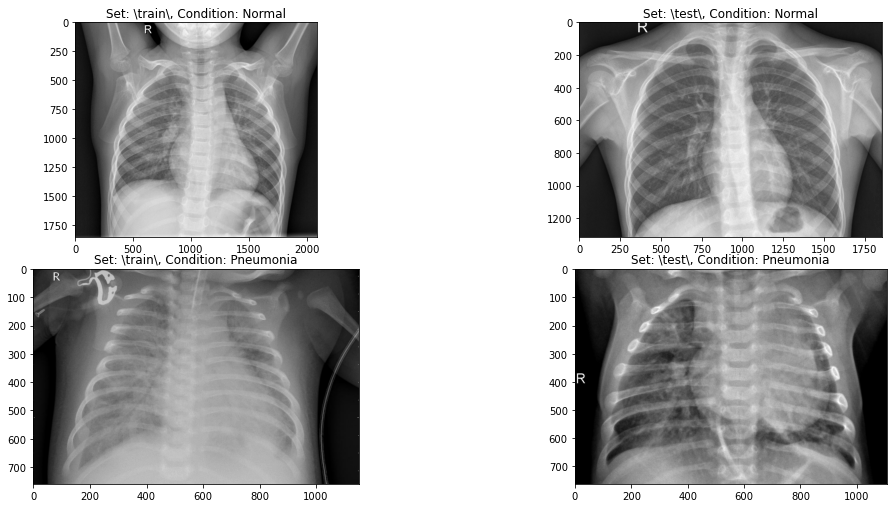

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['\\train\\','\\test\\']):
    set_path = my_data_dir+_set
    ax[i].imshow(plt.imread(set_path+'\\NORMAL\\'+os.listdir(set_path+'\\NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'\\PNEUMONIA\\'+os.listdir(set_path+'\\PNEUMONIA')[0]), cmap='gray')
    ax[i+2].set_title('Set: {}, Condition: Pneumonia'.format(_set))

#  CNN proposed Model

__To view the first image in the normal train folder__

In [45]:
os.listdir(train_path+'\\NORMAL')[0]

'IM-0115-0001.jpeg'

In [46]:
normal_img=train_path+'\\NORMAL'+'\\IM-0115-0001.jpeg'

In [47]:
normal_img= imread(normal_img)

In [48]:
# viewing the image shape
normal_img.shape

(1858, 2090)

As we see, the image is grayscale image, which mean it have one channel out of the 3 RGB channels

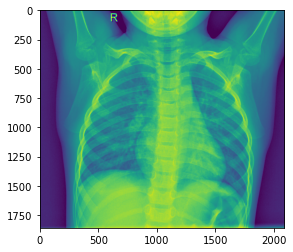

In [49]:
#Viewing the image
plt.imshow(normal_img)

__To view the first image in the PNEUMONIA train folder__

In [50]:
os.listdir(train_path+'\\PNEUMONIA')[0]

'person1000_bacteria_2931.jpeg'

In [51]:
infected_img=train_path+'\\PNEUMONIA'+'\\person1000_bacteria_2931.jpeg'

In [52]:
infected_img=imread(infected_img)

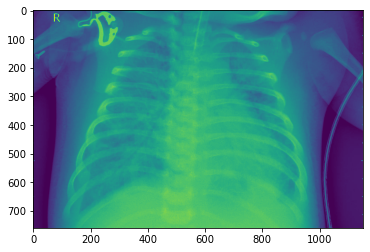

In [53]:
plt.imshow(infected_img)

In [54]:
infected_img.shape

(760, 1152)

## Preparing the Data for the model

__We can easily process large amounts of data by generating batches from a directory and then manipulating the images__.

### Defining the Image shape
__The images in the folders come with different sizes, We have decided to resize the images to (150,150) to be fid to the model__

In [55]:
image_shape = (150,150)

### Image Manipulation

Rotation, resizing, and scaling of images are generally very useful for making the model more robust to images that our data set doesn't contain. We will use the **ImageDataGenerator** to do this process. 8 transormation operation will be applied

__Defining the `batch_size` which is number of images will be produced by `ImageDataGenerator` in each training iteration__

In [56]:
batch_size = 16

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

Now we will generate the training images using the 8 transformation used in the previous step. 

- color_mode is grayscale since all our images are grayscale now RGB.

- class_mode binary since we have binary classification

In [59]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape,
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 5232 images belonging to 2 classes.


For the test images, we just need to normlize them since we just need to use them for testing

In [60]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [61]:
test_image_gen = test_datagen.flow_from_directory(test_path,
                                               target_size=image_shape,
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 624 images belonging to 2 classes.


Checking the class label per produced by `ImageDataGenerator`

In [62]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [63]:
test_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

## The CNN model architecture

__I have tried to build many CNN achitetures and try to tune the model then I have chosen the best tuned one. 
Below i will show the first CNN model and the best tuned CNN model.__

### 1. First CNN Model
This CNN model  consists of 3 convolutional layers, 3 MaxPooling layers, 1 flatten layer, and 1 fully connected layer, 1 dropout layer

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [66]:
model=Sequential()


model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150, 150, 1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)      

In [68]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [69]:
result= model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
327/327 [==============================] - 47s 120ms/step - loss: 0.4827 - accuracy: 0.7712 - val_loss: 0.5946 - val_accuracy: 0.7228
Epoch 2/20
327/327 [==============================] - 34s 103ms/step - loss: 0.3238 - accuracy: 0.8542 - val_loss: 0.4302 - val_accuracy: 0.8045
Epoch 3/20
327/327 [==============================] - 33s 102ms/step - loss: 0.2642 - accuracy: 0.8870 - val_loss: 0.3135 - val_accuracy: 0.8830
Epoch 4/20
327/327 [==============================] - 34s 103ms/step - loss: 0.2561 - accuracy: 0.8930 - val_loss: 0.3365 - val_accuracy: 0.8542
Epoch 5/20
327/327 [==============================] - 33s 102ms/step - loss: 0.2398 - accuracy: 0.9012 - val_loss: 0.4338 - val_accuracy: 0.8494


In [70]:
losses = pd.DataFrame(model.history.history)

In [74]:
model.evaluate(test_image_gen)

39/39 [==============================] - 3s 66ms/step - loss: 0.4338 - accuracy: 0.8494


[0.433756023645401, 0.8493589758872986]

#### The model have 84.9% accuracy

<AxesSubplot:>

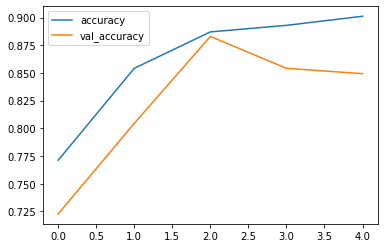

In [71]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

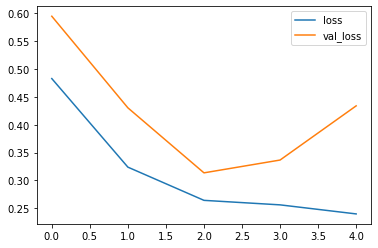

In [72]:
losses[['loss','val_loss']].plot()

The model achieved 84.9% accuracy which can be optimized further. As we can see from the accuracy and loss plots that the model is not good and overfi since the gap between training accuracy and validation (testing) accuracy is big and the same with the loss, the training loss is keep decreasing till the last epoch while after the second epoch the validation loss is started to rise which indicate that the model is overfit.

## 2. The proposed tuned CNN model architecture
__The CNN model used in this Course work consists of 4 convolutional layers, 4 MaxPooling layers, 1 flatten layer, and 1 fully connected layer, 1 dropout layer__

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [67]:
model = Sequential() 

model.add(Conv2D(32, (3, 3), input_shape = (150, 150, 1), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1, activation = 'sigmoid'))  

opt = Adam(learning_rate=0.001)
model.compile(optimizer='Adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

__Defining the `ReduceLROnPlateau` callback parameter. Its primary goal is when validation accuracy has stopped improving and has plateaued for 3 epochs, it will reduce the default learning rate by a factor of 3 to optimize the model performance with lower learning bound =0.000001__.

In [69]:
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)

__Defining the class weight to solve the issue of the imbalance dataset. Since we have 1349 normal images and 3883 Pneumonia images in the train dataset, we have assigned class weight= 2.8 to normal class and 1 toPneumonia class__

In [70]:
class_weight = {0: 2.8,
                1: 1.0}

__Now Fitting the model__

In [71]:
history = model.fit(train_image_gen, epochs = 20, 
                    validation_data = test_image_gen,verbose=1,callbacks=[lr_reduction],class_weight=class_weight)

Epoch 1/20
327/327 [==============================] - 37s 105ms/step - loss: 0.8101 - accuracy: 0.6670 - val_loss: 0.4028 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 2/20
327/327 [==============================] - 34s 103ms/step - loss: 0.5047 - accuracy: 0.8412 - val_loss: 0.2895 - val_accuracy: 0.8830 - lr: 0.0010
Epoch 3/20
327/327 [==============================] - 34s 102ms/step - loss: 0.4661 - accuracy: 0.8578 - val_loss: 0.3330 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 4/20
327/327 [==============================] - 34s 103ms/step - loss: 0.4106 - accuracy: 0.8813 - val_loss: 0.4527 - val_accuracy: 0.7660 - lr: 0.0010
Epoch 5/20
327/327 [==============================] - 34s 104ms/step - loss: 0.3862 - accuracy: 0.8912 - val_loss: 0.2899 - val_accuracy: 0.8878 - lr: 0.0010
Epoch 6/20
327/327 [==============================] - 36s 110ms/step - loss: 0.3540 - accuracy: 0.8987 - val_loss: 0.2689 - val_accuracy: 0.8990 - lr: 0.0010
Epoch 7/20
327/327 [==============================] 

In [87]:
from tensorflow.keras.models import load_model
model.save('Chest_Xray_final.h5')

In [72]:
# the monitored evaluation metrics during the training
model.metrics_names

['loss', 'accuracy']

In [73]:
#Creating dataframe from the model recorded history
losses = pd.DataFrame(model.history.history)

In [74]:
losses.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.810074,0.667049,0.402801,0.791667,0.001
1,0.504705,0.841170,0.289503,0.883013,0.001
2,0.466058,0.857798,0.333017,0.854167,0.001
3,0.410615,0.881307,0.452744,0.766026,0.001
4,0.386189,0.891246,0.289894,0.887821,0.001


### Plotting the training accuracy and validation accuray

<AxesSubplot:>

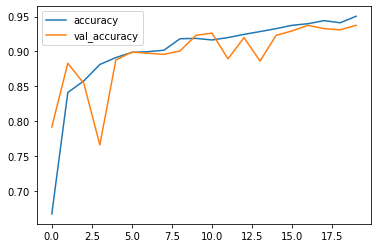

In [75]:
losses[['accuracy','val_accuracy']].plot()

From the accuracy plot, we can see that the model performance is improving in each epoch which means its learning. Also, we can see the model is not overfit since the gap between validation accuracy and training accuracy is very small. Small note we can add here that there is a possibility to improve further the model if we trained the model for more epochs since the accuracy graphs are still rising for both training and validation in the last epoch.

### Plotting the training loss and validation loss

<AxesSubplot:>

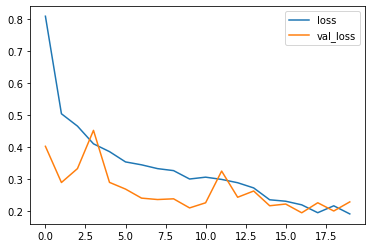

In [76]:
losses[['loss','val_loss']].plot()

Training losses show how well the model fits the training data, whereas validation losses point to how well it fits the new data. The training loss is decreasing with each iteration (epoch) achieving low loss values. As we can see, the validation loss was decreasing till the 16 epochs, and the training was stopped to avoid overfitting since the validation loss started to rise in the last epoch.

__To check the model accuracy__

In [77]:
model.evaluate(test_image_gen)

39/39 [==============================] - 3s 66ms/step - loss: 0.2288 - accuracy: 0.9375


[0.22879314422607422, 0.9375]

CNN Model accuracy = 93.7 %

__To predict the test images__

`model.predict()` will return probability label list for each image in the test images. then we will  sit condition that any probabilty bigger than 0.5 it will be labelled as Pneumonia and any probability lower than 0.5 will be labelled to Normal

In [ ]:
# to predict the test data class label
pred_probabilities = model.predict(test_image_gen)

In [79]:
#This will return a probability list for each test image 
pred_probabilities

array([[1.56137543e-02],
       [1.55792162e-02],
       [6.61213249e-02],
       [6.56253248e-02],
       [5.53811193e-02],
       [1.42148668e-02],
       [2.26103999e-02],
       [2.19537660e-01],
       [5.39635569e-02],
       [1.30053669e-01],
       [1.03097700e-01],
       [2.31422126e-01],
       [1.59597285e-02],
       [8.65884423e-02],
       [5.27175330e-02],
       [8.84934664e-02],
       [9.89759684e-01],
       [5.93788102e-02],
       [1.08818971e-02],
       [1.37211382e-02],
       [4.27423678e-02],
       [1.53231040e-01],
       [1.97947830e-01],
       [1.15864441e-01],
       [7.93424398e-02],
       [9.03838128e-02],
       [9.18707773e-02],
       [1.18616521e-02],
       [4.45757836e-01],
       [8.31077099e-02],
       [4.77660112e-02],
       [9.21982229e-02],
       [5.18711284e-02],
       [4.31679972e-02],
       [6.07771762e-02],
       [1.00054201e-02],
       [2.89535761e-04],
       [8.21091607e-03],
       [4.02694708e-03],
       [9.56186932e-03],


In [80]:
# the true label of the test images
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

__Now here any probability higher than 0.5 will be assigned as Pneumonia and any probability lower than 0.5 will be assigned to Normal__

In [81]:
predictions = pred_probabilities > 0.5

In [82]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(classification_report(y_true=test_image_gen.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.96      0.87      0.91       234
   PNEUMONIA       0.92      0.98      0.95       390

    accuracy                           0.94       624
   macro avg       0.94      0.92      0.93       624
weighted avg       0.94      0.94      0.94       624



In [89]:
confusion_matrix(test_image_gen.classes,predictions)

array([[203,  31],
       [  8, 382]], dtype=int64)

<AxesSubplot:>

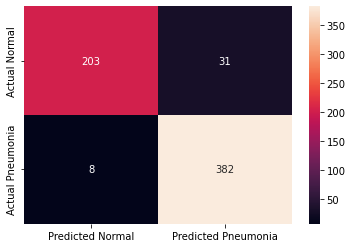

In [101]:
cm = pd.DataFrame(data=confusion_matrix(test_image_gen.classes, predictions, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                columns=["Predicted Normal", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

__CNN model accuracy= 93.7 %__

__Precision = `TP/(TP+FP)` = 0.92__

__Recall= `TP/(TP+FN)` = 0.98__

__F1 score= `(2 X (Precision X Recall )) / ( Precision + Recall )`= 0.95__